### Gradient Descent for Linear Regression

Tutorial from alternate source ref: https://www.youtube.com/watch?v=Souzjv6WfrY
<br> check: https://developers.google.com/machine-learning/crash-course/linear-regression/gradient-descent


>What is Gradient Descent:<br>Gradient descent is an optimisation method used to find the minimum of a function. It’s commonly used in machine learning to adjust model parameters to reduce errors in predictions.<br>In simple terms: starting from an initial guess, it iteratively moves in the direction of the steepest descent (i.e., the negative gradient) to gradually reach the lowest point (minimum error).

###### This tutorial is for Gradient descent for linear regression.
$\hat{y} = wx + b$
<br>This is the formula for a simple linear model where 𝑤 is the weight (slope), 𝑥 is the input, and 𝑏 is the intercept (bias). Output is a prediction ($\hat{y}$)
​

$\text{L} = \frac{1}{N} \sum (y - \hat{y})^2$
<br>This is the mean squared error (MSE) loss function, measuring how far predictions $\hat{y}$ are from actual values 𝑦. The lower the loss, the better the predictions.

In [ ]:
#Gradient Descent for Linear regression_
# y^=wx + b (linear regression formula)
#loss=(y-y^)**2 / N (MSE (Mean Square Error) formula)

import numpy as np # import required module

In [139]:
# Initialise parameters for linear regression 

# Parameters
x = np.random.randn(10,1)  # Generate 10 random values for x (independent variable)
y = 2*x + np.random.randn(10, 1)  # Generate corresponding y values with a slope of 2 and unique random noise for each point
#print(x, y)
w = 0.0  # Initialize weight (slope) as 0.0
b = 0.0  # Initialize bias (intercept) as 0.0

# Hyperparameter
learning_rate = 0.01  # Learning rate, controlling the size of steps in gradient descent


**Parameters (`x` and `y`):**

- `x` is the input data for our model.
- `y` is based on `x` with a true slope of 2, plus random noise to make it more realistic.

**Model Parameters (`w` and `b`):**

- `w` (slope) and `b` (intercept) are values we’ll adjust to make our predictions match `y` as closely as possible.

**Hyperparameter (`learning_rate`):**

- This controls how big each step is in gradient descent. It decides how much we adjust `w` and `b` to reduce prediction error.



In [140]:
# create Gradient Descent function
def gradient_descent(x, y, w, b, learning_rate):
    # Calculate derivatives of the loss with respect to each parameter
    derivative_of_w = 0.0  # Fixed spelling mistake from "dervivative" to "derivative"
    derivative_of_b = 0.0
    N = x.shape[0]  # Number of data points

    # Loss (L) = (y - y_hat)^2 / N; for linear regression, this is (y - (wx + b))^2 / N
    for xi, yi in zip(x, y):
        # Use the chain rule for differentiation
        derivative_of_w += -2 * xi * (yi - (w * xi + b))
        derivative_of_b += -2 * (yi - (w * xi + b))

    # Update parameters
    w = w - learning_rate * (1 / N) * derivative_of_w
    b = b - learning_rate * (1 / N) * derivative_of_b

    return b, w

The `gradient_descent` function runs the gradient descent algorithm for linear regression. It takes five inputs: the data `x`, the actual values `y`, the weight (slope) `w`, the bias (intercept) `b`, and the `learning_rate`, which decides how much to change the parameters each time.

First, it sets the derivatives for `w` and `b` to zero. It also defines `N` as the number of data points in `x`. The function calculates the Mean Squared Error (MSE) loss, which measures how far the predicted values $(\hat{y}$) (found using $(wx + b$)) are from the actual values `y`.

In a loop, it goes through each pair of input and output, calculating the derivatives using the chain rule. It sums up how much each data point affects the gradients for `w` and `b`. After getting the total derivatives, it updates `w` and `b` by applying the learning rate and averaging the changes by dividing by `N`.

Finally, it returns the updated bias `b` and weight `w`, which can be used for the next training step or to make predictions.



In [141]:
for epoch in range(400):  # Loop over 400 epochs
    # Run Gradient Descent function to update model parameters
    w, b = gradient_descent(x, y, w, b, learning_rate)

    # Calculate predictions using the current weight and bias
    yhat = w * x + b

    # Compute Mean Squared Error (MSE) loss
    loss = np.divide(np.sum((y - yhat)**2, axis=0), x.shape[0])

    # Print the current epoch, loss, and parameters for monitoring
    print(f'{epoch} loss is {loss}, parameters: w: {w}, b: {b}')


0 loss is [3.00162588], parameters: w: [-0.01491289], b: [0.01813607]
1 loss is [2.94699874], parameters: w: [0.00282205], b: [0.00339462]
2 loss is [2.99983121], parameters: w: [-0.01157889], b: [0.02094325]
3 loss is [2.94697101], parameters: w: [0.00558168], b: [0.00670796]
4 loss is [2.99810687], parameters: w: [-0.0083247], b: [0.02368834]
5 loss is [2.94695769], parameters: w: [0.00828024], b: [0.009942]
6 loss is [2.99645006], parameters: w: [-0.0051484], b: [0.02637266]
7 loss is [2.94695768], parameters: w: [0.01091906], b: [0.01309866]
8 loss is [2.99485809], parameters: w: [-0.00204808], b: [0.02899754]
9 loss is [2.94696993], parameters: w: [0.01349943], b: [0.01617981]
10 loss is [2.99332836], parameters: w: [0.0009781], b: [0.03156426]
11 loss is [2.94699348], parameters: w: [0.01602261], b: [0.01918729]
12 loss is [2.99185841], parameters: w: [0.00393192], b: [0.03407409]
13 loss is [2.94702739], parameters: w: [0.01848984], b: [0.02212287]
14 loss is [2.99044585], param

The code runs a training loop for a linear regression model using the gradient descent algorithm. It executes for 400 epochs, where in each epoch, it updates the model parameters (weight `w` and bias `b`) by calling the `gradient_descent` function. After updating, it calculates the predicted values (`yhat`) based on the current parameters and computes the Mean Squared Error (MSE) loss, which measures the difference between the actual values (`y`) and the predictions. The loss and updated parameters are printed for each epoch to track the training progress and see how the model improves over time.


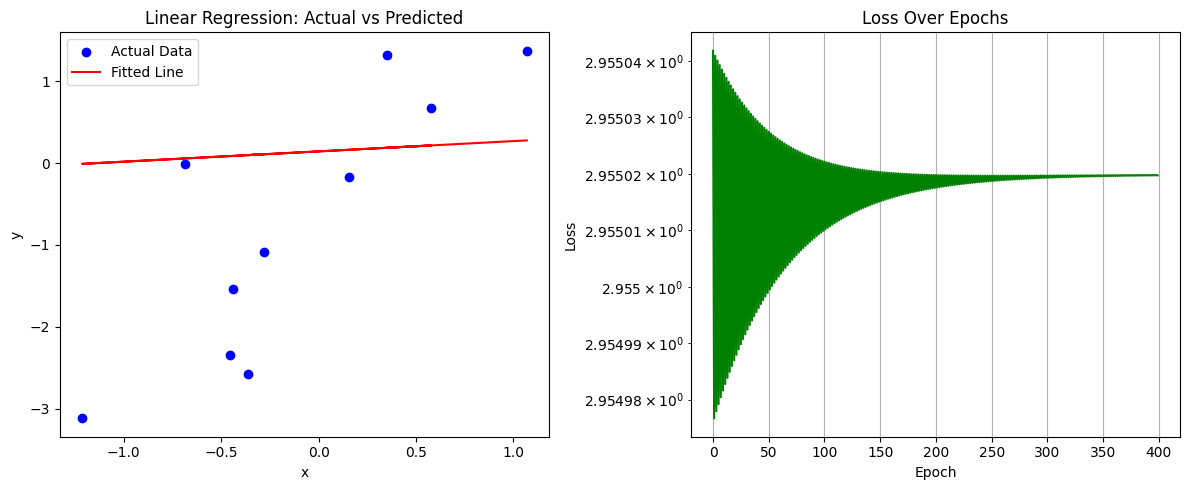

In [142]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming your existing code for gradient descent and training loop is here

# Initialize lists to store loss values for visualization
loss_values = []

for epoch in range(400):
    w, b = gradient_descent(x, y, w, b, learning_rate)
    yhat = w * x + b
    loss = np.divide(np.sum((y - yhat)**2, axis=0), x.shape[0])
    
    # Append the current loss to the list
    loss_values.append(loss)

    # Uncomment to see progress in terminal
    # print(f'{epoch} loss is {loss}, parameters: w: {w}, b: {b}')

# Visualization: Predictions vs. Actual Data
plt.figure(figsize=(12, 5))

# Subplot 1: Data points and regression line
plt.subplot(1, 2, 1)
plt.scatter(x, y, color='blue', label='Actual Data')  # Actual data points

# Final fitted line using last values of w and b
final_yhat = w * x + b
plt.plot(x, final_yhat, color='red', label='Fitted Line')  # Final predicted line
plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear Regression: Actual vs Predicted')
plt.legend()

# Subplot 2: Loss over epochs
plt.subplot(1, 2, 2)
plt.plot(loss_values, color='green')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Over Epochs')
plt.yscale('log')  # Optional: use logarithmic scale for better visibility
plt.grid()

plt.tight_layout()
plt.show()






#### Demonstrating Gradient Descent models from scipy and sklearn
- from scipy.optimize import minimize
- from sklearn.linear_model import LinearRegression

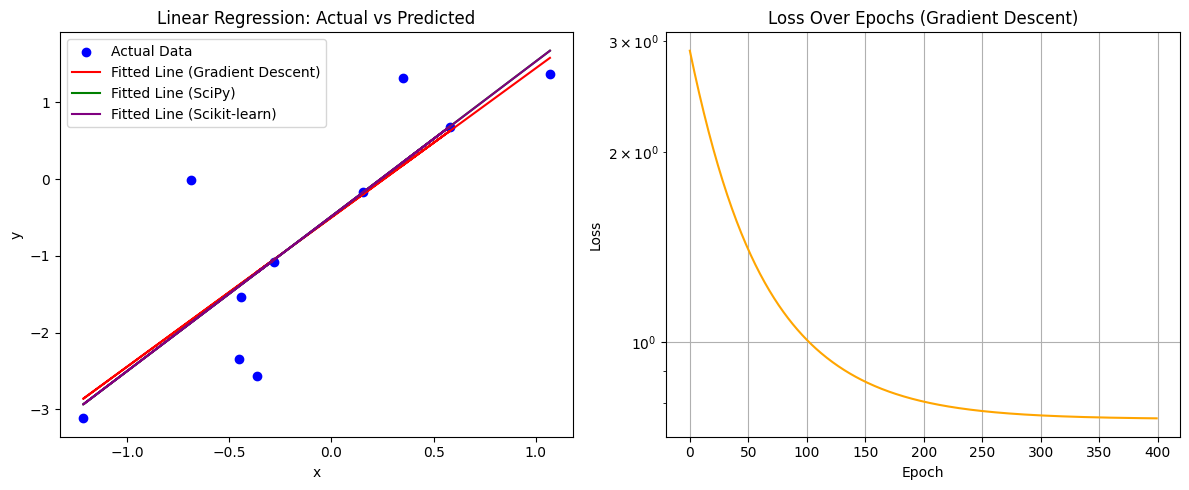

In [143]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from sklearn.linear_model import LinearRegression

# Generate sample data
#np.random.seed(0)  # For reproducibility
#x = np.random.randn(100, 1)  # 100 random samples
#y = 2 * x + np.random.randn(100, 1) * 0.5  # Linear relation with some noise

# Initialize gradient descent parameters
#w, b = 0.0, 0.0
#learning_rate = 0.01
loss_values = []

# Gradient Descent function
def gradient_descent(x, y, w, b, learning_rate):
    derivative_of_w = 0.0
    derivative_of_b = 0.0
    N = x.shape[0]

    for xi, yi in zip(x, y):
        derivative_of_w += -2 * xi * (yi - (w * xi + b))
        derivative_of_b += -2 * (yi - (w * xi + b))

    w -= learning_rate * (1/N) * derivative_of_w
    b -= learning_rate * (1/N) * derivative_of_b

    return w, b

# Run Gradient Descent
for epoch in range(400):
    w, b = gradient_descent(x, y, w, b, learning_rate)
    yhat = w * x + b
    loss = np.divide(np.sum((y - yhat)**2), x.shape[0])
    loss_values.append(loss)

# Visualization: Predictions vs. Actual Data
plt.figure(figsize=(12, 5))

# Subplot 1: Data points and regression line from gradient descent
plt.subplot(1, 2, 1)
plt.scatter(x, y, color='blue', label='Actual Data')  # Actual data points

# Final fitted line using last values of w and b
final_yhat = w * x + b
plt.plot(x, final_yhat, color='red', label='Fitted Line (Gradient Descent)')  # Final predicted line
plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear Regression: Actual vs Predicted')
plt.legend()

# Fit a model using SciPy minimize
def loss_function(params):
    w, b = params
    yhat = w * x + b
    return np.mean((y - yhat) ** 2)  # Mean Squared Error

# Minimize the loss function using scipy
initial_params = np.array([0.0, 0.0])  # Initial guess for w and b
result = minimize(loss_function, initial_params)
optimal_w, optimal_b = result.x

# Plot the fitted line from scipy
optimal_yhat = optimal_w * x + optimal_b
plt.plot(x, optimal_yhat, color='green', label='Fitted Line (SciPy)')  # Fitted line from SciPy

# Fit a model using scikit-learn
model = LinearRegression()
model.fit(x, y)
sklearn_yhat = model.predict(x)

# Plot the fitted line from sklearn
plt.plot(x, sklearn_yhat, color='purple', label='Fitted Line (Scikit-learn)')  # Fitted line from sklearn

plt.legend()

# Subplot 2: Loss over epochs
plt.subplot(1, 2, 2)
plt.plot(loss_values, color='orange')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Over Epochs (Gradient Descent)')
plt.yscale('log')  # Optional: use logarithmic scale for better visibility
plt.grid()

plt.tight_layout()
plt.show()

